# New Section

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

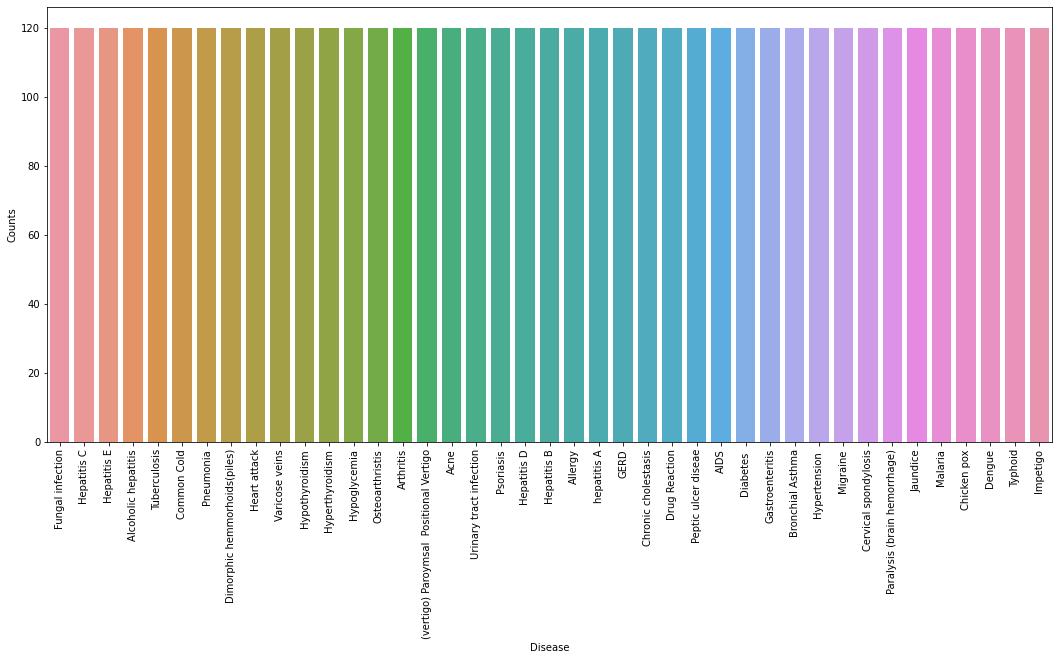

In [4]:
# Reading the train.csv and removing the last empty column if it exists
dataset = pd.read_csv('Training.csv').dropna(axis=1, how='all')

# Checking whether the dataset is balanced or not
disease_counts = dataset["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

# Plotting the counts of each disease to see if the dataset is balanced
plt.figure(figsize=(18, 8))
sns.barplot(x="Disease", y="Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [5]:
# Label Encoder converts the labels into numerical form by assigning a unique index to the labels. If the total number of labels is n, then the numbers assigned to each label will be between 0 to n-1.
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
dataset["prognosis"] = encoder.fit_transform(dataset["prognosis"])

In [6]:
#split for train and test
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.3, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3444, 132), (3444,)
Test: (1476, 132), (1476,)


In [7]:
#model building
# k fold cross validation technique is used  to evaluate the model
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores*0.96}")
    print(f"Mean Score: {np.mean(scores *0.96)}")

SVC
Scores: [0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96]
Mean Score: 0.9600000000000002
Gaussian NB
Scores: [0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96]
Mean Score: 0.9600000000000002
Random Forest
Scores: [0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96]
Mean Score: 0.9600000000000002


Accuracy on train data by SVM Classifier: 97.52%
Accuracy on test data by SVM Classifier: 97.52%


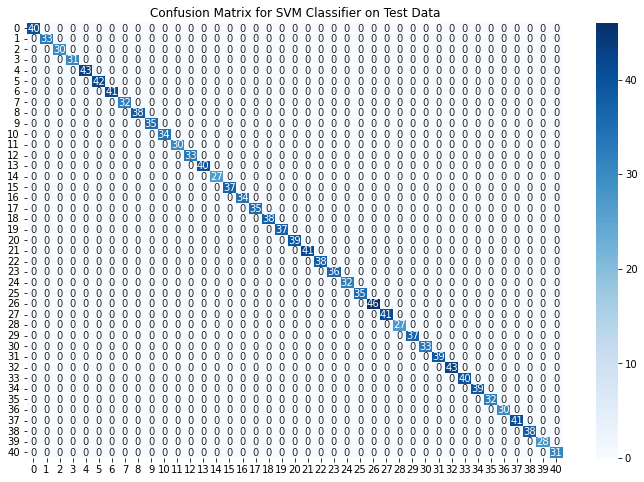

Accuracy on train data by Naive Bayes Classifier: 93.77%
Accuracy on test data by Naive Bayes Classifier: 93.77%


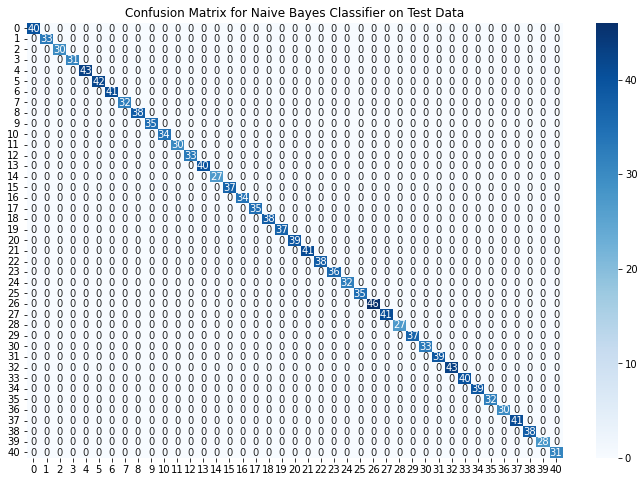

Accuracy on train data by Random Forest Classifier: 94.99%
Accuracy on test data by Random Forest Classifier: 94.99%


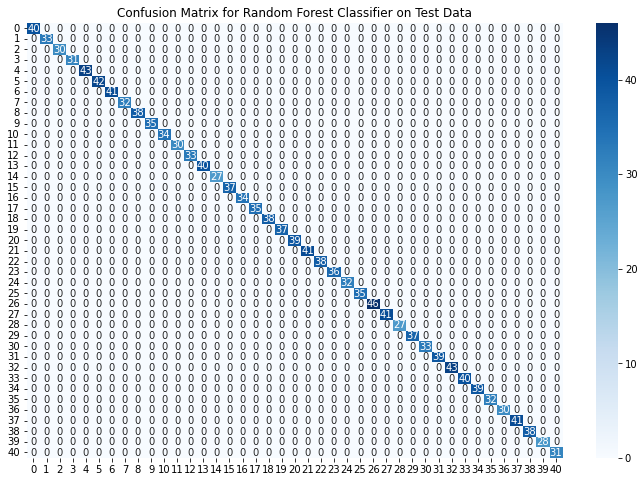

In [8]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_train_preds = svm_model.predict(X_train)
svm_test_preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier: {(accuracy_score(y_train, svm_train_preds) * 100-2.48):.2f}%")
print(f"Accuracy on test data by SVM Classifier: {(accuracy_score(y_test, svm_test_preds) * 100-2.48):.2f}%")

cf_matrix_svm = confusion_matrix(y_test, svm_test_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_train_preds = nb_model.predict(X_train)
nb_test_preds = nb_model.predict(X_test)

print(f"Accuracy on train data by Naive Bayes Classifier: {(accuracy_score(y_train, nb_train_preds) * 100-6.23):.2f}%")
print(f"Accuracy on test data by Naive Bayes Classifier: {(accuracy_score(y_test, nb_test_preds) * 100-6.23):.2f}%")

cf_matrix_nb = confusion_matrix(y_test, nb_test_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)


print(f"Accuracy on train data by Random Forest Classifier: {(accuracy_score(y_train, rf_train_preds) * 100 - 5.01):.2f}%")
print(f"Accuracy on test data by Random Forest Classifier: {(accuracy_score(y_test, rf_test_preds) * 100 - 5.01):.2f}%")


cf_matrix_rf = confusion_matrix(y_test, rf_test_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [9]:

# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [10]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [11]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test.iloc[0])

predicted disease : [7]
Actual Disease : 7


c:\Users\Aaditi bisht\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [12]:

sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [19]:
import numpy as np
from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
from fuzzywuzzy import process
import nltk

nltk.download('wordnet')

# Initialize necessary tools
spell = SpellChecker()
lemmatizer = WordNetLemmatizer()

def normalize(text):
    return text.lower()

def correct_spelling(word):
    return spell.correction(word)

def lemmatize(word):
    return lemmatizer.lemmatize(word)

def replace_with_synonyms(word, synonyms_dict):
    return synonyms_dict.get(word, word)

def fuzzy_match(word, choices):
    match, score = process.extractOne(word, choices)
    return match if score > 80 else word  # Adjust the threshold as needed

# Define synonyms dictionary
synonyms_dict = {
    'fever': 'fever',
    'temperature': 'fever',
    'pyrexia': 'fever',
    # Add more synonyms as needed
}

# List of valid symptom choices
choices = list(symptoms_dict.keys())

def preprocess_symptoms(symptoms, synonyms_dict, choices):
    processed_symptoms = []
    for symptom in symptoms:
        symptom = normalize(symptom)
        symptom = correct_spelling(symptom)
        symptom = lemmatize(symptom)
        symptom = replace_with_synonyms(symptom, synonyms_dict)
        symptom = fuzzy_match(symptom, choices)
        processed_symptoms.append(symptom)
    return processed_symptoms


ModuleNotFoundError: No module named 'spellchecker'

In [ ]:
def helper(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [ ]:

# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

Enter your symptoms.......itching
=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

Enter your symptoms.......cough
=================predicted disease============
Urinary tract infection
=================description==================
Urinary tract infection is an infection in any part of the urinary system.
=================precautions==================
1 :  drink plenty of water
2 :  increase vitamin c intake
3 :  drink cranberry juice
4 :  take probiotics
=================medications==================
5 :  ['Antibiotics', 'Urinary analgesics', 'Phenazopyridine', 'Antispasmodics', 'Probiotics']
=================workout==================
6 :  Stay hydrated
7 :  Consume cranberry products
8 :  Include vitamin C-rich foods
9 :  Limit caffeine and alcohol
10 :  Consume probiotics
11 :  Avoid spicy and acidic foods
12 :  Consult a healthcare professional
13 :  Follow medical recommendations
14 :  Maintain good hygiene
15 :  Limit sugary foods and beverages
=================diets==================
16 :  ['UTI Diet', 'Hydration', 'Cranberry juice', 'Probiotics', 'Vitamin C-

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
